# Lecture 5: Statistics

## Example: mean, standard deviation of a sample

In [6]:
# standard preamble
import numpy as np
import scipy as sp
from scipy import stats # notice that we're introducing a new library here
import matplotlib.pyplot as plt
%matplotlib inline

If you want to learn more about what's available in the stats module, have a look here: https://docs.scipy.org/doc/scipy/reference/stats.html

Read randomly sampled data from a file, histogram it

Number of samples = 90


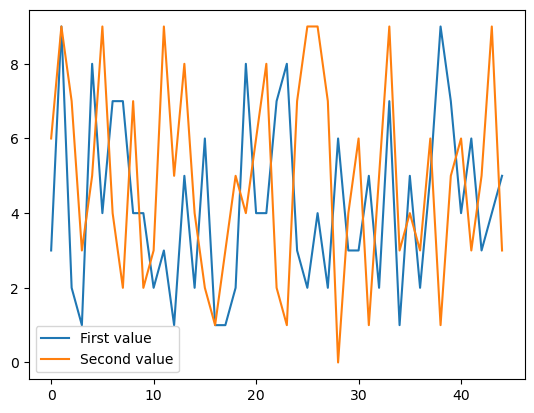

In [7]:
x1,x2 = np.loadtxt('sample.dat',unpack=True)
x = np.concatenate((x1,x2))
print('Number of samples =',len(x))

# plot the data
plt.plot(x1,label="First value")
plt.plot(x2,label="Second value")
plt.legend()


Mean = 4.6
Median = 4.0
Mode = 3.0
Mode from SciPy = 3.0
Standard deviation = 2.5


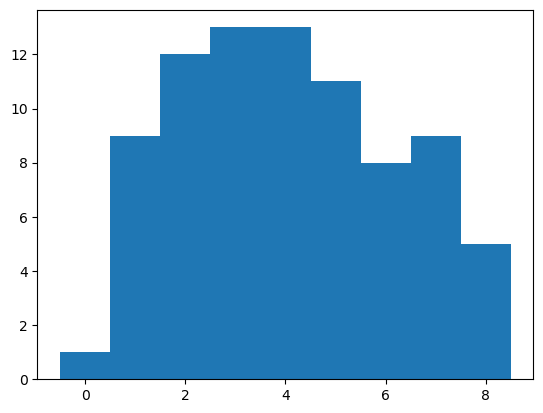

In [8]:
bins = np.arange(-0.5,9.5,1)
n, b, p = plt.hist(x, bins)

# various measures of "average value":
print ('Mean = {0:3.1f}'.format(np.mean(x)))
print ('Median = {0:3.1f}'.format(np.median(x)))
print ('Mode = {0:3.1f}'.format(0.5*(bins[np.argmax(n)]+bins[np.argmax(n)+1])))
mode, count = sp.stats.mode(x)
print('Mode from SciPy = {0:3.1f}'.format(mode[0]))

# measure of the spread
print ('Standard deviation = {0:3.1f}'.format(np.std(x,ddof=1)))  # unbiased with ddof=1

Plot the correlation between two variables

Pearson correlation coefficient = -0.124


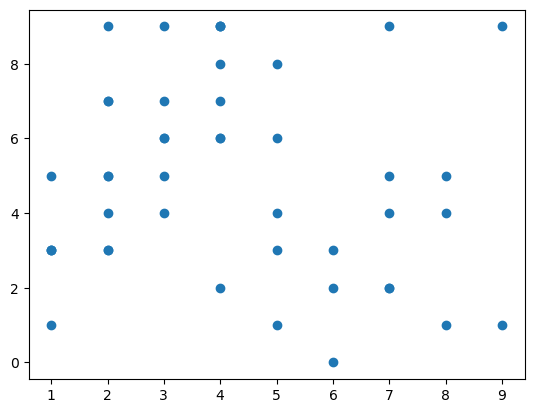

In [9]:
plt.scatter(x1,x2)
corr = np.corrcoef(x1,x2)
print('Pearson correlation coefficient = {0:5.3f}'.format(corr[0,1]))

Plot the difference between the two numbers

Mean = -0.6 +/- 0.6
Median = -2.0
Standard deviation = 3.7


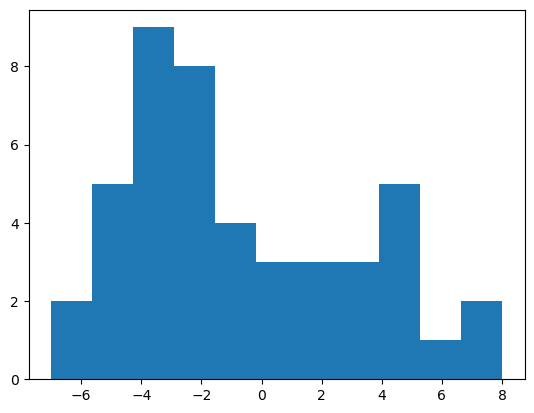

In [10]:
dx = x1-x2
n, b, p = plt.hist(dx, bins=11)

mean = np.mean(dx)
std  = np.std(dx,ddof=1)
N = len(dx)
# various measures of "average value":
print ('Mean = {0:3.1f} +/- {1:3.1f}'.format(mean,std/np.sqrt(N)))
print ('Median = {0:3.1f}'.format(np.median(dx)))
# measure of the spread
print ('Standard deviation = {0:3.1f}'.format(std))  # unbiased with ddof=1

### Example of a Gaussian process: sample vs population

[204.31060434 214.30923879 200.69415133 210.90343552 243.88469392
 184.13875533 177.97247869 190.52078672 201.97520269 178.74292998]
Mean = 200.04
Median = 200.04
Mode = 205.00
Standard deviation =  25.0


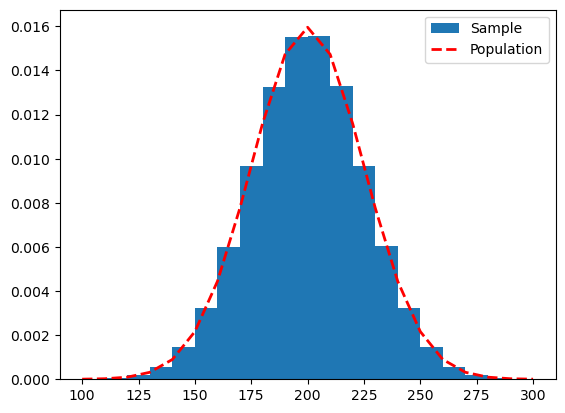

In [11]:
from scipy.stats import norm

# create a set of data and compute mean and variance
# This creates an array of N elements, 
# gaussian-distributed with mean of 200 and RMS of 25
N = 1000000
mu = 200
sigma = 25
x = mu + sigma*np.random.randn(N)
print (x[0:10])
bins = np.linspace(mu-4*sigma,mu+4*sigma,21)
n, bins, patches = plt.hist(x, bins, density=True,label='Sample')  # NB: new keyword in Matplotlib 3.3 
plt.plot(bins, norm.pdf(bins, mu, sigma), 'r--',  linewidth=2, label='Population')
plt.legend()

# various measures of "average value":
print ('Mean = {0:5.2f}'.format(np.mean(x)))
print ('Median = {0:5.2f}'.format(np.median(x)))
print ('Mode = {0:5.2f}'.format(0.5*(bins[np.argmax(n)]+bins[np.argmax(n)+1])))

# measure of the spread
print ('Standard deviation = {0:5.1f}'.format(np.std(x)))


### Example of a Poisson process

Number of samples = 90


Text(0, 0.5, 'Samples')

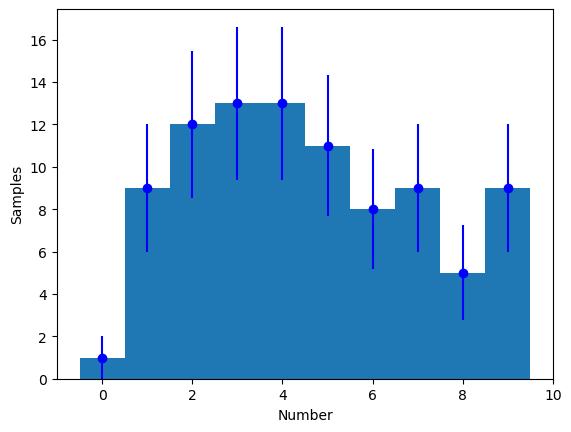

In [12]:
#x = np.loadtxt('sample_merged.dat',unpack=True)
x1,x2 = np.loadtxt('sample.dat',unpack=True)
x = np.concatenate((x1,x2))
#x = x1.copy()

N = len(x)
print('Number of samples =',N)
bins = np.arange(-0.5,10.5,1)
n, b, p = plt.hist(x, bins)
expected = 0.1*N*np.ones(len(n))
# loop over all entries in the histogram, compute chi^2 assuming 
# Poisson errors for each bin

en = np.zeros(len(n))
for i in range(0,10):
    value = n[i]
    error = np.sqrt(value)
    if value == 0:
        error = 1
    en[i] = error
    
# plot the distribition with error bars
x = np.arange(0,10)
plt.errorbar(x, n, xerr=0, yerr=en, fmt='bo')
plt.xlabel('Number')
plt.ylabel('Samples')

### Central limit theorem

Central limit theorem states that if you have any PDF with mean $\mu$ and variance $\sigma^2$, and you draw $N$ samples $\{ x_i \},\ i=[1..N]$ from the distribution, the PDF of the <b>sample mean</b>
$$
\mu_s = \frac{1}{N}\sum_{i=1}^N x_i
$$
approaches Gaussian with mean $\langle \mu_s\rangle = \mu$ and variance 
$\sigma_s^2 = \sigma^2/N$ when $N\to\infty$

Let's look at the example. Take the data collected in class:

$$N=17$$
$$f(x_i) = \frac{1}{10}, x_i\in[0..9]$$

As an exercise for the reader, prove analytically that 
$$\sigma = 10/\sqrt{12} = 2.89$$


In [13]:
# compute mean and sigma of the parent distribution

mu = 0
sigma = 0
prob = 1./10.
for i in range(0,10):
    mu += prob*i
print('mu = {0:4.2f}'.format(mu))

for i in range(0,10):
    sigma += prob*(i-mu)**2
sigma = np.sqrt(sigma)
print('sigma = {0:4.2f}'.format(sigma))


mu = 4.50
sigma = 2.87


We will now draw 90 random <i>integer</i> numbers uniformly distributed between 0 and 9 inclusively, and compute the mean of the distribution. Let's define a function for that, as we would be calling it a large number of times

In [14]:
def drawN(N):
    samples = np.random.randint(0,10,N)
    return np.mean(samples)

N = 90
print(drawN(N))

4.5777777777777775


Now let's look at a population of the means

Mean = 4.505
Median = 4.500
Mode = 4.577
Standard deviation = 0.302
Predicted value of standard deviation = 0.303


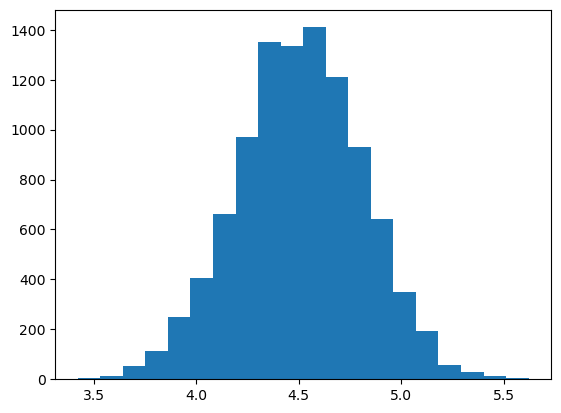

In [15]:
Ndraws = 10000
x = np.empty(Ndraws)
N = 90
for i in range(Ndraws):
    x[i] = drawN(N)
    
n, bins, patches = plt.hist(x, 20, density=False)

# various measures of "average value":
print ('Mean = {0:5.3f}'.format(np.mean(x)))
print ('Median = {0:5.3f}'.format(np.median(x)))
print ('Mode = {0:5.3f}'.format(0.5*(bins[np.argmax(n)]+bins[np.argmax(n)+1])))

# measure of the spread
print ('Standard deviation = {0:5.3f}'.format(np.std(x)))

# check
print('Predicted value of standard deviation = {0:5.3f}'.format(sigma/np.sqrt(N)))

## Fitting

The simplest technique to describe is least-squares fitting (see lecture notes). Usually you use the least-squares fit if you have a graph (i.e. a set of data points $y_i(x_i)$), you want to describe it in terms of a model $y(x;\theta)$, where parameters $\theta$ are unknown. You fit to determine the values of $\theta$ and (hopefully) their uncertainties.  

There are two standard cases where least-squares method is applicable:
1. You know errors for each data point $\sigma_i$ and you know that those errors are Gaussian. In this case, you minimize $\chi^2=\sum \left(\frac{y_i - y(x_i;\theta)}{\sigma_i}\right)^2$. The value of the $\chi^2_{\min}$ can be interpreted as a goodness-of-fit, and the errors on parameters $\theta$ have probabilistic interpretation
1. You know that the errors are Gaussian and are the same for each data point, but you do not know their magnitude. In this case, you would minimize the sum of squares: $\mathcal{S} = \sum \left(y_i - y(x_i;\theta)\right)^2$. In this case the value of $\mathcal{S}$ can be used to compute the errors $\sigma_i$ for each data point, and the errors on $\theta$ have probabilistic definition, but you lose information about the goodness of fit
1. If the errors are not known to be Gaussian, then the least square method is not useful to estimate uncertainties or the goodness of fit. It is also not guaranteed to be unbiased or most efficient. 

### Examples

#### Polynomial fit

Let's use the scipy.optimize module: https://docs.scipy.org/doc/scipy/reference/optimize.htmlhttps://docs.scipy.org/doc/scipy/reference/optimize.html

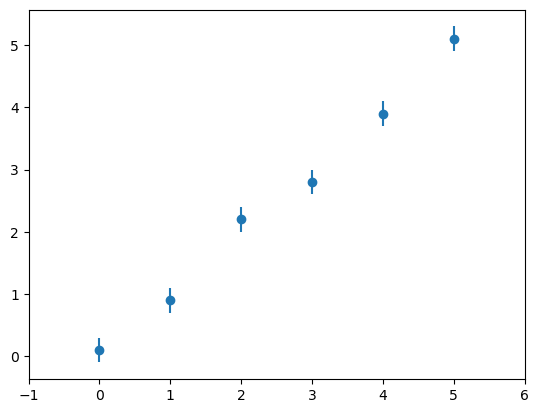

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as fitter


# Generate artificial data = straight line with a=0 and b=1
# plus some noise.
a0 = 0
b0 = 1
xdata = np.array([0.0,1.0,2.0,3.0,4.0,5.0])  # Voltage (V)
ydata = np.array([0.1,0.9,2.2,2.8,3.9,5.1])  # current (A)
sigma = np.array([1.0,1.0,1.0,1.0,1.0,1.0])*0.2  # 0.2 A error in current

# plot it
plt.errorbar(xdata, ydata, xerr=0, yerr=sigma, fmt='o')
plt.xlim(-1,6)
plt.show()

Now define the model:

In [2]:
# linear function
def model(x, a, b):
    return a + b*x

The fitter needs a good initial guess of parameters (more on that later):

a= 0.029+/-0.145
b= 0.989+/-0.048

Correlation matrix:
  [[ 1.         -0.82572282]
 [-0.82572282  1.        ]] 

chi^2 =  2.94 for d.f.=4
chi^2/d.f.=7.36e-01


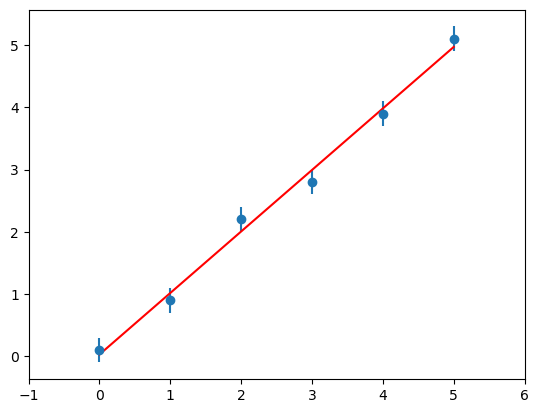

In [3]:
# Initial guess.
par0    = np.array([0.0, 1.0])
(par, cov) = fitter.curve_fit(model, xdata, ydata, p0=par0, sigma=sigma, absolute_sigma=True)
#print ('par=',par)
#print ('cov=',cov)

# decode it now
print ('a={0:6.3f}+/-{1:5.3f}'.format(par[0],np.sqrt(cov[0,0])))
print ('b={0:6.3f}+/-{1:5.3f}\n'.format(par[1],np.sqrt(cov[1,1])))

corr = cov.copy() # copy shape
# compute correlation matrix
for i in range(len(par)):
    for j in range(len(par)):
        corr[i,j] = cov[i,j]/np.sqrt(cov[i,i]*cov[j,j])
        
print ('Correlation matrix:\n ',corr,'\n')

# compute reduced chi2
chi_squared = np.sum(((model(xdata, *par)-ydata)/sigma)**2)
reduced_chi_squared = (chi_squared)/(len(xdata)-len(par))
print ('chi^2 = {0:5.2f} for d.f.={1:d}'.format(chi_squared,len(xdata)-len(par)))
print ('chi^2/d.f.={0:5.2e}'.format(reduced_chi_squared))

# overlay plot over data
plt.errorbar(xdata, ydata, xerr=0, yerr=sigma, fmt='o')
plt.xlim(-1,6)
xfit = np.linspace(0,5,50)
plt.plot(xfit,model(xfit,par[0],par[1]),'r-')
plt.show()

Now let's do the same, but use a second order polynomial as our model.

[0.1        0.88142857 0.02142857]
a= 0.100+/-0.181
b= 0.881+/-0.171
c= 0.021+/-0.033

Correlation matrix:
 [[ 1.         -0.76267206  0.60192934]
 [-0.76267206  1.         -0.95988329]
 [ 0.60192934 -0.95988329  1.        ]] 

chi^2 =  2.51
chi^2/d.f.= 0.84


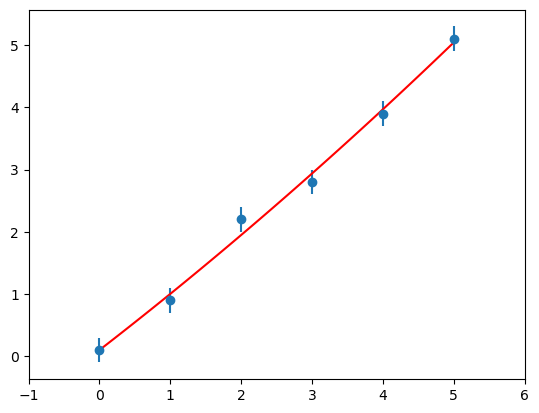

In [4]:
from numpy import sqrt

# quadratic function
def model2(x, a, b, c):
    return a + b*x + c*x*x

par0    = np.array([0.0, 1.0, 0.0])
par, cov = fitter.curve_fit(model2, xdata, ydata, p0=par0, sigma=sigma, absolute_sigma=True)
print (par)
#print (cov)

# decode it now
print ('a={0:6.3f}+/-{1:5.3f}'.format(par[0],sqrt(cov[0,0])))
print ('b={0:6.3f}+/-{1:5.3f}'.format(par[1],sqrt(cov[1,1])))
print ('c={0:6.3f}+/-{1:5.3f}\n'.format(par[2],sqrt(cov[2,2])))

corr = cov.copy() # copy shape
# compute correlation matrix
for i in range(len(par)):
    for j in range(len(par)):
        corr[i,j] = cov[i,j]/sqrt(cov[i,i]*cov[j,j])
        
print ('Correlation matrix:\n',corr,'\n')

# compute reduced chi2
chi_squared = np.sum(((model2(xdata, *par)-ydata)/sigma)**2)
reduced_chi_squared = (chi_squared)/(len(xdata)-len(par))
print ('chi^2 = {0:5.2f}'.format(chi_squared))
print ('chi^2/d.f.={0:5.2f}'.format(reduced_chi_squared))

# overlay plot over data
plt.errorbar(xdata, ydata, xerr=0, yerr=sigma, fmt='o')
plt.xlim(-1,6)
xfit = np.linspace(0,5,50)
plt.plot(xfit,model2(xfit,par[0],par[1], par[2]),'r-')
plt.show()

Now extend this to use a N-th order polynomial.

parameters: [ 0.1        -1.25        3.61666667 -1.96666667  0.43333333 -0.03333333]
Covariance matrix:
 [[ 4.00000003e-02 -9.13327490e-02  7.49988830e-02 -2.83326179e-02
   4.99981447e-03 -3.33316649e-04]
 [-9.13327490e-02  2.71708312e+00 -4.23499071e+00  2.27188347e+00
  -5.01665366e-01  3.90221131e-02]
 [ 7.49988830e-02 -4.23499071e+00  6.92318004e+00 -3.80624179e+00
   8.53470291e-01 -6.70831742e-02]
 [-2.83326179e-02  2.27188347e+00 -3.80624179e+00  2.12416206e+00
  -4.81248926e-01  3.81110235e-02]
 [ 4.99981447e-03 -5.01665366e-01  8.53470291e-01 -4.81248926e-01
   1.09860863e-01 -8.74997986e-03]
 [-3.33316649e-04  3.90221131e-02 -6.70831742e-02  3.81110235e-02
  -8.74997986e-03  6.99998373e-04]] 

p0= 0.100 +/- 0.200
p1=-1.250 +/- 1.648
p2= 3.617 +/- 2.631
p3=-1.967 +/- 1.457
p4= 0.433 +/- 0.331
p5=-0.033 +/- 0.026

Correlation matrix:
 [[ 1.         -0.27704165  0.14251874 -0.09719924  0.07542275 -0.062991  ]
 [-0.27704165  1.         -0.9764459   0.94567251 -0.91820817  0.894

/var/folders/sg/h6rbzs2s5gx46fbp7ylyjggr0000gp/T/ipykernel_417/3139599767.py:29: RuntimeWarning: divide by zero encountered in double_scalars
  reduced_chi_squared = (chi_squared)/(len(xdata)-len(par))


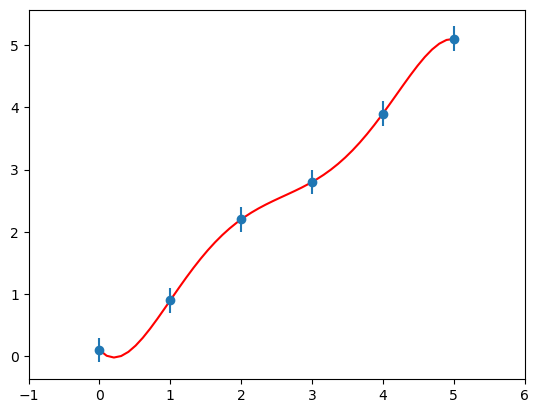

In [5]:
# Nth-order poly function
def modelN(*arg):
    x = arg[0]
    N = len(arg)-1
    sum = arg[1]
    for i in range(1,N):
        sum += arg[i+1]*x**i
    return sum

N=5   # poly degree
par0    = np.zeros(N+1)
par[1]=1
par, cov = fitter.curve_fit(modelN, xdata, ydata, p0=par0, sigma=sigma,absolute_sigma=True)
print ('parameters:',par)
print ('Covariance matrix:\n',cov,'\n')
for i in range(0,N+1):
    print('p{index:1d}={val:6.3f} +/- {err:5.3f}'.format(index=i,val=par[i],err=np.sqrt(cov[i,i])))

corr = cov.copy() # copy shape
# compute correlation matrix
for i in range(len(par)):
    for j in range(len(par)):
        corr[i,j] = cov[i,j]/np.sqrt(cov[i,i]*cov[j,j])
        
print ('\nCorrelation matrix:\n',corr,'\n')

# compute reduced chi2
chi_squared = np.sum(((modelN(xdata, *par)-ydata)/sigma)**2)
reduced_chi_squared = (chi_squared)/(len(xdata)-len(par))
print ('chi^2 = {0:5.2f}'.format(chi_squared))
print ('chi^2/d.f.={0:5.2f}'.format(reduced_chi_squared))

# overlay plot over data
plt.errorbar(xdata, ydata, xerr=0, yerr=sigma, fmt='o')
plt.xlim(-1,6)
xfit = np.linspace(0,5,50)
plt.plot(xfit,modelN(xfit,*par),'r-')
plt.show()

### Caveat: correlations

You may notice that the polynomial parameters are highly correlated. You can reduce them by using *Chebychev polynomials*. Here is an example:

a= 2.500+/-0.070
b= 0.989+/-0.041

Correlation matrix:
 [[ 1.00000000e+00 -4.41304799e-09]
 [-4.41304799e-09  1.00000000e+00]] 

chi^2 =  2.94
chi^2/d.f.= 0.74


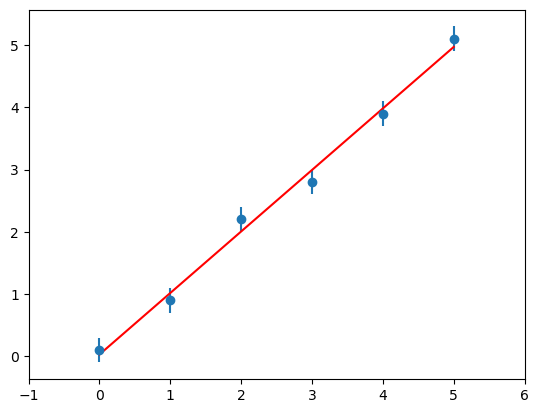

In [21]:
# linear function
def modelC(x, a, b):
    return a + b*(x-2.5)

# Initial guess.
par0    = np.array([0.0, 1.0])
par, cov = fitter.curve_fit(modelC, xdata, ydata, par0, sigma)
#print (par)
#print (cov)

# decode it now
print ('a={0:6.3f}+/-{1:5.3f}'.format(par[0],sqrt(cov[0,0])))
print ('b={0:6.3f}+/-{1:5.3f}\n'.format(par[1],sqrt(cov[1,1])))

corr = cov.copy() # copy shape
# compute correlation matrix
for i in range(len(par)):
    for j in range(len(par)):
        corr[i,j] = cov[i,j]/sqrt(cov[i,i]*cov[j,j])
        
print ('Correlation matrix:\n',corr,'\n')

# compute reduced chi2
chi_squared = np.sum(((modelC(xdata, *par)-ydata)/sigma)**2)
reduced_chi_squared = (chi_squared)/(len(xdata)-len(par))
print ('chi^2 = {0:5.2f}'.format(chi_squared))
print ('chi^2/d.f.={0:5.2f}'.format(reduced_chi_squared))

# overlay plot over data
plt.errorbar(xdata, ydata, xerr=0, yerr=sigma, fmt='o')
plt.xlim(-1,6)
xfit = np.linspace(0,5,50)
plt.plot(xfit,modelC(xfit,par[0],par[1]),'r-')
plt.show()

### Warning: Lack of robustness
Gradient methods such as *Levenburg-Marquardt* used by *leastsq/curve_fit* are not robust and simply run into the nearest local minimum. Therefore, it is important to provide the initial set of values that are "close enough". Here is the demonstration below (courtesy https://python4mpia.github.io/fitting_data/least-squares-fitting.html)


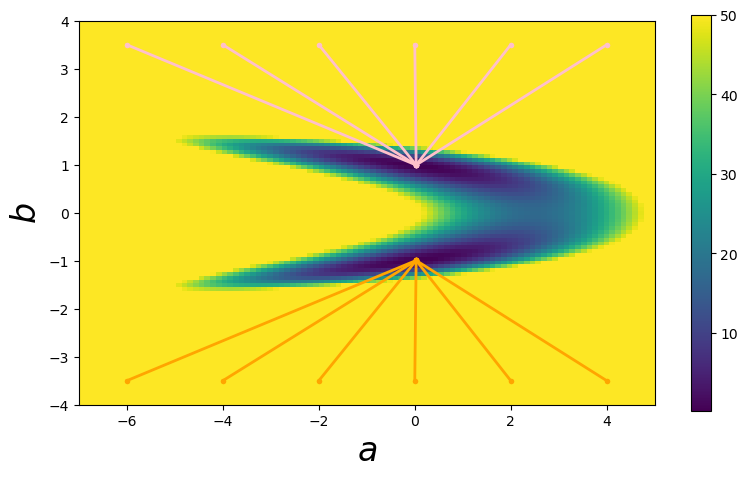

In [22]:
import numpy,math
import scipy.optimize as optimization
import matplotlib.pyplot as plt

# Chose a model that will create bimodality.
def func(x, a, b):
    return a + b*b*x  # Term b*b will create bimodality.

# Create toy data for curve_fit.
xdata = numpy.array([0.0,1.0,2.0,3.0,4.0,5.0])
ydata = numpy.array([0.1,0.9,2.2,2.8,3.9,5.1])
sigma = numpy.array([1.0,1.0,1.0,1.0,1.0,1.0])

# Compute chi-square manifold.
Steps = 101  # grid size
Chi2Manifold = numpy.zeros([Steps,Steps])  # allocate grid
amin = -7.0  # minimal value of a covered by grid
amax = +5.0  # maximal value of a covered by grid
bmin = -4.0  # minimal value of b covered by grid
bmax = +4.0  # maximal value of b covered by grid
for s1 in range(Steps):
    for s2 in range(Steps):
        # Current values of (a,b) at grid position (s1,s2).
        a = amin + (amax - amin)*float(s1)/(Steps-1)
        b = bmin + (bmax - bmin)*float(s2)/(Steps-1)
        # Evaluate chi-squared.
        chi2 = 0.0
        for n in range(len(xdata)):
            residual = (ydata[n] - func(xdata[n], a, b))/sigma[n]
            chi2 = chi2 + residual*residual
        Chi2Manifold[Steps-1-s2,s1] = chi2  # write result to grid.

# Plot grid.
plt.figure(1, figsize=(8,4.5))
plt.subplots_adjust(left=0.09, bottom=0.09, top=0.97, right=0.99)
# Plot chi-square manifold.
image = plt.imshow(Chi2Manifold, vmax=50.0,
              extent=[amin, amax, bmin, bmax])
# Plot where curve-fit is going to for a couple of initial guesses.
for a_initial in -6.0, -4.0, -2.0, 0.0, 2.0, 4.0:
    # Initial guess.
    x0   = numpy.array([a_initial, -3.5])
    xFit = optimization.curve_fit(func, xdata, ydata, x0, sigma)[0]
    plt.plot([x0[0], xFit[0]], [x0[1], xFit[1]], 'o-', ms=4,
                 markeredgewidth=0, lw=2, color='orange')
    
for a_initial in -6.0, -4.0, -2.0, 0.0, 2.0, 4.0:
    # Initial guess.
    x0   = numpy.array([a_initial, 3.5])
    xFit = optimization.curve_fit(func, xdata, ydata, x0, sigma)[0]
    plt.plot([x0[0], xFit[0]], [x0[1], xFit[1]], 'o-', ms=4,
                 markeredgewidth=0, lw=2, color='pink')
plt.colorbar(image)  # make colorbar
plt.xlim(amin, amax)
plt.ylim(bmin, bmax)
plt.xlabel(r'$a$', fontsize=24)
plt.ylabel(r'$b$', fontsize=24)
plt.show()

## Example: histogram fitting 

Here is an example of an unbinned *max-likelihood* fit of a set of events to a Gaussian PDF
Courtesy http://glowingpython.blogspot.com/2012/07/distribution-fitting-with-scipy.html

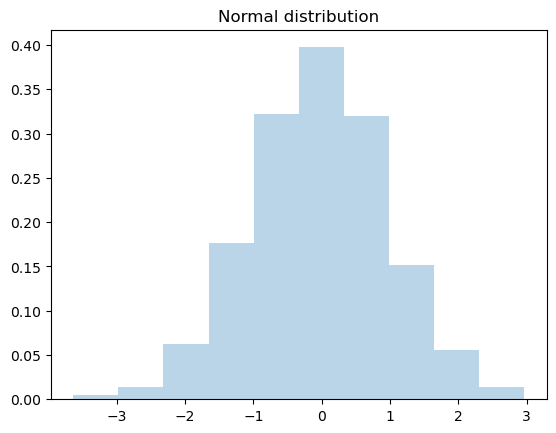

In [33]:
from scipy.stats import norm
from numpy import linspace
from pylab import plot,show,hist,figure,title

# generate 1000 events from a normal distrubution
# with mean 0 and standard deviation 1
sample = norm.rvs(loc=0,scale=1,size=1000) 

title('Normal distribution')
hist(sample,density=True,alpha=.3)
show()

mu=-0.05, sigma=0.99


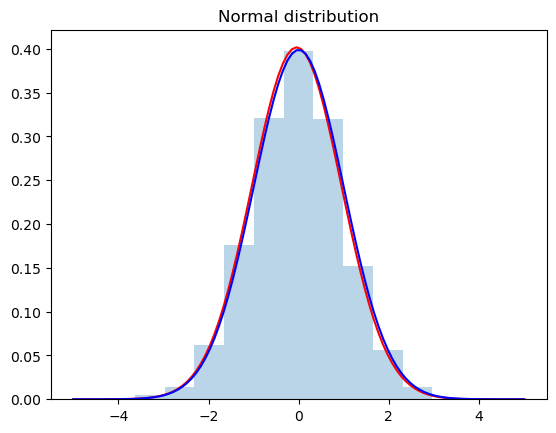

In [34]:
#print(sample)
par = norm.fit(sample) # distribution fitting

#hist(sample,20)

print ('mu={0:.2f}, sigma={1:.2f}'.format(par[0],par[1]))

# now, par[0] and par[1] are the mean and 
# the standard deviation of the fitted distribution
x = linspace(-5,5,100)
# fitted distribution
pdf_fitted = norm.pdf(x,loc=par[0],scale=par[1])
# original distribution
pdf = norm.pdf(x)

title('Normal distribution')
hist(sample,density=True,alpha=.3)
plot(x,pdf_fitted,'r-',x,pdf,'b-')
show()

### Binned histogram fit

One issue with the <i>unbinned</i> ML fit is that `norm.fit` does not compute the error on the parameters. So if you want to compute errors (as any experimentalist must), use `curve_fit` on the binned histogram:

A     = 132.40 +/- 5.19
mu    = -0.037 +/- 0.032
sigma = 0.984 +/- 0.023


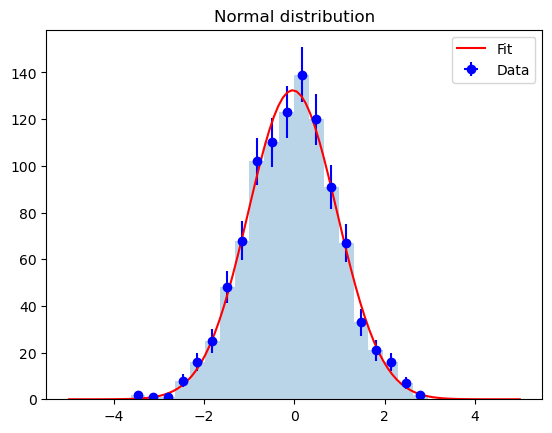

In [35]:
# define the Gaussian likelihood function
def gaussian(x, A, mu, sigma):
    return A*np.exp(-0.5*((x-mu)/sigma)**2)


plt.title('Normal distribution')
n, bins, patches = plt.hist(sample,bins=20,density=False,alpha=.3)
bin_x = [0.5*(bins[i-1]+bins[i]) for i in range(1,len(bins))]
bin_width = bins[1]-bins[0]
err_n = np.sqrt(n)
plt.errorbar(bin_x, n, xerr=0, yerr=err_n, fmt='bo',label='Data')

#fit
par, cov = fitter.curve_fit(gaussian, bin_x, n, p0=[100,0.,1], 
                            sigma=err_n, absolute_sigma=True)

A      = par[0]
A_err  = np.sqrt(cov[0,0])
mu     = par[1]
mu_err = np.sqrt(cov[1,1])
sigma = par[2]
sigma_err = np.sqrt(cov[2,2])
print('A     = {0:.2f} +/- {1:.2f}'.format(A,A_err))
print('mu    = {0:.3f} +/- {1:.3f}'.format(mu, mu_err))
print('sigma = {0:.3f} +/- {1:.3f}'.format(sigma, sigma_err))

pdf_fitted = gaussian(x,A,mu,sigma)
plt.plot(x,pdf_fitted,'r',label='Fit')

plt.legend()

plt.show()

### More advanced tools

For more advanced fitting options, you can try packages <a href="https://nbviewer.org/github/scikit-hep/probfit/blob/master/tutorial/tutorial.ipynb">probfit</a>, <a href="https://github.com/zfit/zfit-tutorials">zfit</a>, and others. `probfit` and `zfit` are based on the minimization package called `MINUIT`, which is widely used in particle and nuclear physics. 

### Advanced: Bayesian fit using PyMC3

/var/folders/sg/h6rbzs2s5gx46fbp7ylyjggr0000gp/T/ipykernel_7195/134909734.py:12: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(1000, cores=1)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


Sequential sampling (2 chains in 1 job)
NUTS: [sigma, mu]


/opt/anaconda3/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 2 seconds.
/opt/anaconda3/lib/python3.10/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


mu    = -0.045 +/- 0.032
sigma = 0.992 +/- 0.022


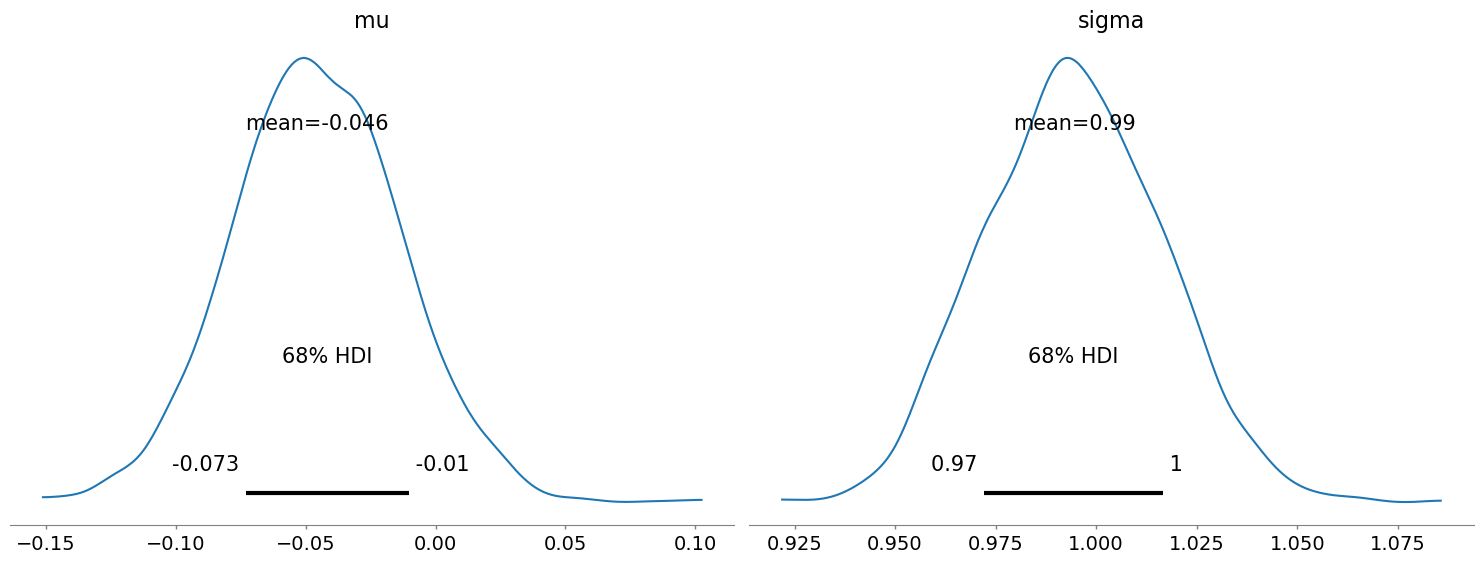

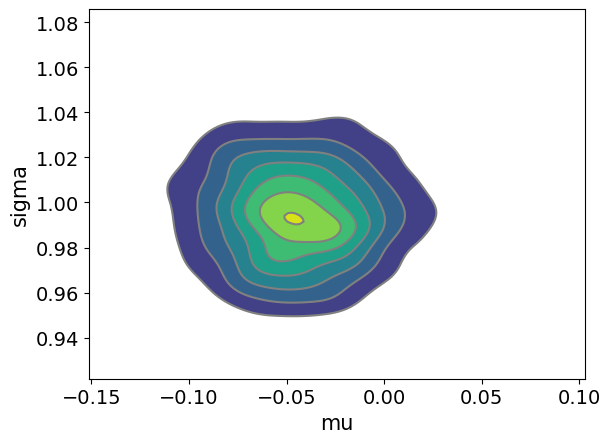

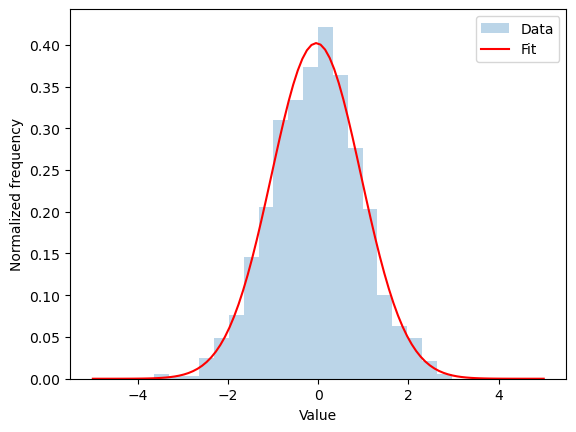

In [36]:
import pymc3 as pm

# define the PyMC model
with pm.Model() as model:
    # define the parameters of the model
    mu = pm.Normal("mu", mu=0, sigma=1)
    sigma = pm.HalfNormal("sigma", sigma=1)
    obs = pm.Normal("obs", mu=mu, sigma=sigma, observed=sample)

    # perform the fit
    mode = pm.find_MAP()
    trace = pm.sample(1000, cores=1)

    
# plot the posterior
pm.plot_posterior(trace, var_names=['mu', 'sigma'], hdi_prob=0.68)
pm.plot_pair(trace, var_names=['mu', 'sigma'],kind='kde')


# extract the parameters from the trace
#mu = np.mean(trace['mu'])
#sigma = np.mean(trace['sigma'])
mu = mode['mu']
sigma = mode['sigma']
mu_err = np.std(trace['mu'])
sigma_err = np.std(trace['sigma'])
print('mu    = {0:.3f} +/- {1:.3f}'.format(mu, mu_err))
print('sigma = {0:.3f} +/- {1:.3f}'.format(sigma, sigma_err))

# plot the distribution of values
plt.figure()
plt.hist(sample, bins=20, density=True, alpha=0.3, label='Data')

# plot the result of the PyMC fit
x = np.linspace(-5, 5, 100)
y_fit = norm.pdf(x,loc=mu,scale=sigma)
plt.plot(x, y_fit, 'r-', label='Fit')

# add a legend and labels to the plot
plt.legend()
plt.xlabel('Value')
plt.ylabel('Normalized frequency')

# display the plot
plt.show()



## Hypothesis testing

Let's test if the distribution collected in class in Spring 2019 and Fall 2020 (poll of 71 students of any number from 0 to 9 inclusively) is consistent with a uniform distribution. How would we do it ? 

Try #1: compute the likelihood for this dataset, i.e. the probability to observe exactly the dataset we observe, based on Poisson statistics

Number of samples = 90
Log(likelihood) =  -28.64121517329456
Probability =  3.6414830705317874e-13


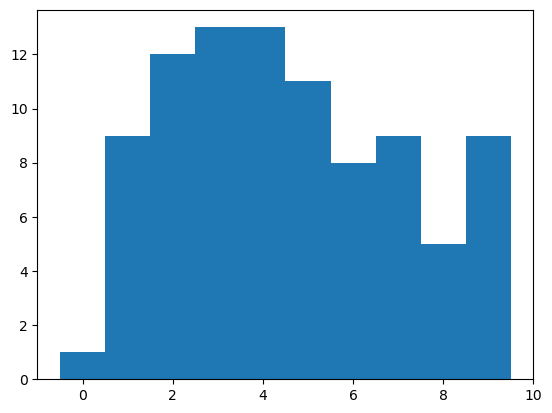

In [38]:
x1,x2 = np.loadtxt('sample.dat',unpack=True)
x = np.concatenate((x1,x2))
N = len(x)
print('Number of samples =',N)

bins = np.arange(-0.5,10.5,1)
n, b, p = plt.hist(x, bins)
expected = 0.1*N

# loop over all entries in the histogram, compute chi^2 assuming 
# Poisson errors for each bin

logL = 0
for i in range(0,10):
    value = n[i]
    logL += sp.stats.poisson.logpmf(value,mu=expected)

print('Log(likelihood) = ',logL)
print('Probability = ',np.exp(logL))


Does the fact that the total probability is so small indicate that the hypothesis is invalid ? Not necessarily. We are looking at one particular outcome -- and the sheer number of all possible outcomes is large. So let's compute what a typical distribution of likelihood values is for a default hypothesis and 71 sampled students

p-value of logL=-28.64 is   7.7%


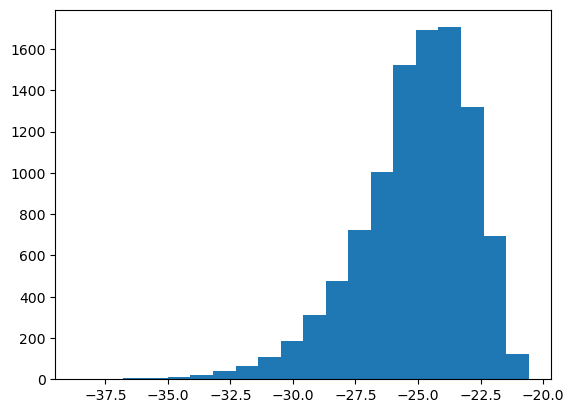

In [28]:
Ntrials = 10000
logL_try = np.zeros(Ntrials)

for itry in range(0,Ntrials):
    # generate a random Poisson-distributed number for each bin
    n = sp.stats.poisson.rvs(mu=expected, size=10)
    logL_try[itry] = 0
    for j in range(0,10):
        value = n[j]
        logL_try[itry] += sp.stats.poisson.logpmf(value,mu=expected)

# plot the distribution
entries, bins, patches = plt.hist(logL_try, 20)

# compare the observed likelihood to the population
pval = sp.stats.percentileofscore(logL_try,logL)
print('p-value of logL={0:5.2f} is {1:5.1f}%'.format(logL,pval))

Try #2: compute the $\chi^2$ with respect to the uniform population hypothesis. 

Number of samples = 90
Expected n = 5.034 +/- 0.710
chi2 = 39.66 for 9 df
p-value = 8.76e-06
chi2 from stats package = 14.00
p-value from stats package = 0.12


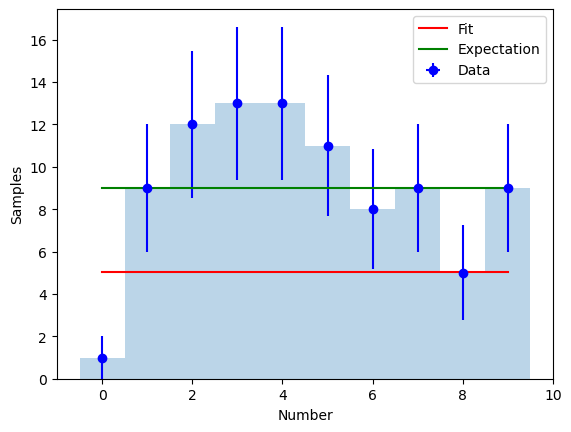

In [39]:
# constant function
def model0(x, a):
    return a

vmodel0 = np.vectorize(model0) # make it take vectors

# read data
#x = np.loadtxt('sample_merged.dat')
x1,x2 = np.loadtxt('sample.dat',unpack=True)
x = np.concatenate((x1,x2))
N = len(x)
print('Number of samples =',N)

# make a histogram 
bins = np.arange(-0.5,10.5,1)
n, b, p = plt.hist(x, bins,alpha=0.3)

# fit the data to a constant
xdata = [0.5*(b[i]+b[i+1]) for i in range(0,len(n))]
en = [np.max([np.sqrt(val),1]) for val in n] # Poisson errors
par, cov = fitter.curve_fit(model0, xdata, n, p0=[0.0], 
                            sigma=en, absolute_sigma=True)

print('Expected n = {0:.3f} +/- {1:.3f}'.format(par[0],np.sqrt(cov[0,0])))
# compute chi^2  
chi2 = np.sum((((n-vmodel0(xdata,*par))/en)**2))
ndf = len(n)-1  # why -1 ? 
print('chi2 = {chi2:4.2f} for {ndf:d} df'.format(chi2=chi2,ndf=ndf))
print('p-value = {0:4.2e}'.format(sp.stats.chi2.sf(chi2,ndf)))

# alternative way to compute p-value is to compare to the expected entries per bin
expected = 0.1*N*np.ones(len(n))
chi2_sp, p_sp = sp.stats.chisquare(f_obs=n,f_exp=expected)
print('chi2 from stats package = {0:4.2f}'.format(chi2_sp))
print('p-value from stats package = {0:4.2f}'.format(p_sp))

# plot the distribition with error bars
plt.errorbar(xdata, n, xerr=0, yerr=en, fmt='bo',label='Data')
plt.plot(xdata,vmodel0(xdata,*par),'r-',label='Fit')
plt.plot(xdata,expected,'g-',label='Expectation')
plt.xlabel('Number')
plt.ylabel('Samples')
plt.legend()